# Simple Workflow with aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import orm, load_profile
load_profile()

workflow_json_filename =  "aiida_simple.json"

In [2]:
from simple_workflow import add_x_and_y as _add_x_and_y
from simple_workflow import add_x_and_y_and_z as _add_x_and_y_and_z

In [3]:
add_x_and_y = task(outputs=['x', 'y', 'z'])(_add_x_and_y)

In [4]:
wg = WorkGraph("wg-simple")

In [5]:
add_x_and_y_task = wg.add_task(
    _add_x_and_y,
    name="add_x_and_y",
    x=orm.Int(1),
    y=orm.Int(2),
)

In [6]:
add_x_and_y_and_z_task = wg.add_task(
    _add_x_and_y_and_z,
    name="add_x_and_y_and_z",
    x=add_x_and_y_task.outputs.x,
    y=add_x_and_y_task.outputs.y,
    z=add_x_and_y_task.outputs.z,
)

In [7]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

{'nodes': {'0': 'simple_workflow.add_x_and_y',
  '1': 'simple_workflow.add_x_and_y_and_z',
  '2': 1,
  '3': 2},
 'edges': [{'tn': 1, 'th': 'x', 'sn': 0, 'sh': 'x'},
  {'tn': 1, 'th': 'y', 'sn': 0, 'sh': 'y'},
  {'tn': 1, 'th': 'z', 'sn': 0, 'sh': 'z'},
  {'tn': 0, 'th': 'x', 'sn': 2, 'sh': None},
  {'tn': 0, 'th': 'y', 'sn': 3, 'sh': None}]}

In [8]:
!cat {workflow_json_filename}

───────┬────────────────────────────────────────────────────────────────────────
       │ File: aiida_to_jobflow_simple.json
───────┼────────────────────────────────────────────────────────────────────────
   1   │ {
   2   │   "nodes": {
   3   │     "0": "simple_workflow.add_x_and_y",
   4   │     "1": "simple_workflow.add_x_and_y_and_z",
   5   │     "2": 1,
   6   │     "3": 2
   7   │   },
   8   │   "edges": [
   9   │     {
  10   │       "tn": 1,
  11   │       "th": "x",
  12   │       "sn": 0,
  13   │       "sh": "x"
  14   │     },
  15   │     {
  16   │       "tn": 1,
  17   │       "th": "y",
  18   │       "sn": 0,
  19   │       "sh": "y"
  20   │     },
  21   │     {
  22   │       "tn": 1,
  23   │       "th": "z",
  24   │       "sn": 0,
  25   │       "sh": "z"
  26   │     },
  27   │     {
  28   │       "tn": 0,
  29   │       "th": "x",
  30   │       "sn": 2,
  31   │       "sh": null
  32   │     },
  33   │     {
  34   │       "tn": 0,
  35   │       "th":

## Load Workflow with jobflow

In [9]:
from python_workflow_definition.jobflow import load_workflow_json

/home/geiger_j/.aiida_venvs/adis/lib/python3.10/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/geiger_j/.aiida_venvs/adis/lib/python3.10/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [10]:
from jobflow.managers.local import run_locally

In [11]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [12]:
result = run_locally(flow)
result

2025-04-02 14:22:25,312 INFO Started executing jobs locally
2025-04-02 14:22:25,474 INFO Starting job - add_x_and_y (064f2b60-33e7-4cee-b5cd-c35156989e6f)
2025-04-02 14:22:25,476 INFO Finished job - add_x_and_y (064f2b60-33e7-4cee-b5cd-c35156989e6f)
2025-04-02 14:22:25,477 INFO Starting job - add_x_and_y_and_z (287a5309-63df-4256-ba6b-4bd56ee20881)
2025-04-02 14:22:25,479 INFO Finished job - add_x_and_y_and_z (287a5309-63df-4256-ba6b-4bd56ee20881)
2025-04-02 14:22:25,479 INFO Finished executing jobs locally


{'064f2b60-33e7-4cee-b5cd-c35156989e6f': {1: Response(output={'x': 1, 'y': 2, 'z': 3}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/geiger_j/aiida_projects/adis/git-repos/python-workflow-definition'))},
 '287a5309-63df-4256-ba6b-4bd56ee20881': {1: Response(output=6, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/geiger_j/aiida_projects/adis/git-repos/python-workflow-definition'))}}

## Load Workflow with pyiron_base

In [13]:
from pyiron_base import Project

In [14]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [15]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

  0%|          | 0/2 [00:00<?, ?it/s]

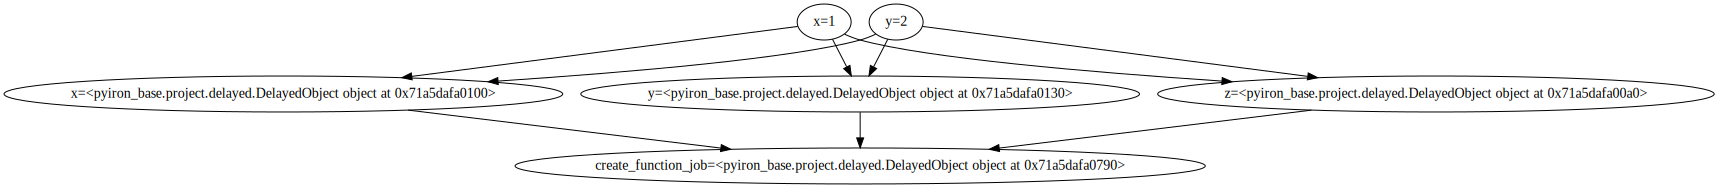

In [16]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [17]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 2
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 3


6